In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [8]:
def XYZToRGB(xyz):
	T = np.array([
		[ 3.240479, -1.537150, -0.498535],
		[-0.969256,  1.875991,  0.041556],
		[ 0.055648, -0.204043,  1.057311]
	
	])
	return T @ xyz

def RGBToXYZ(rgb):
	T = np.array([
		[ 0.412453,  0.212671,  0.019334],
		[ 0.357580,  0.715160,  0.119193],
		[ 0.180423,  0.072169,  0.950227]
	])
	return T @ rgb

XYZToRGB(np.array([0, 0, 1]))

array([-0.498535,  0.041556,  1.057311])

In [3]:
# data from http://www.cvrl.org/
df = pd.read_csv('lin2012xyz2e_5_7sf.csv', names=['lam', 'x', 'y', 'z'])
df

,lam,x,y,z
0,390,0.003770,4.146161e-04,0.018473
1,395,0.009383,1.059646e-03,0.046098
2,400,0.022143,2.452194e-03,0.109609
3,405,0.047430,4.971717e-03,0.236925
4,410,0.089538,9.079860e-03,0.450837
...,...,...,...,...
84,810,0.000006,2.286786e-06,0.000000
85,815,0.000004,1.693147e-06,0.000000
86,820,0.000003,1.262556e-06,0.000000
87,825,0.000002,9.422514e-07,0.000000


C:\Users\jezersek\AppData\Local\Temp\ipykernel_529524\3490132113.py:5: RuntimeWarning: invalid value encountered in power
  rgb = np.where(rgb_linear <= 0.0031308, 12.92 * rgb_linear, 1.055 * (rgb_linear ** (1 / 2.4)) - 0.055)


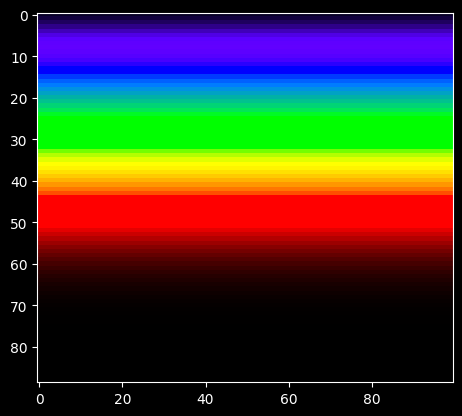

In [36]:
img = np.zeros((df.shape[0], 100, 3))
for i, (l, x, y, z) in enumerate(df.values):
	rgb_linear = XYZToRGB(np.array([x, y, z]))
	# # Gamma correction
	rgb = np.where(rgb_linear <= 0.0031308, 12.92 * rgb_linear, 1.055 * (rgb_linear ** (1 / 2.4)) - 0.055)
	rgb = rgb.clip(0, 1)
	
	img[i, :, 0] = rgb[0]
	img[i, :, 1] = rgb[1]
	img[i, :, 2] = rgb[2]


plt.imshow(img)


In [41]:
len(CIE_X)

471

In [2]:
# from: https://github.com/mmp/pbrt-v3/blob/master/src/core/spectrum.cpp

CIE_X = [
    0.0001299000,   0.0001458470,   0.0001638021,   0.0001840037,
    0.0002066902,   0.0002321000,   0.0002607280,   0.0002930750,
    0.0003293880,   0.0003699140,   0.0004149000,   0.0004641587,
    0.0005189860,   0.0005818540,   0.0006552347,   0.0007416000,
    0.0008450296,   0.0009645268,   0.001094949,    0.001231154,
    0.001368000,    0.001502050,    0.001642328,    0.001802382,
    0.001995757,    0.002236000,    0.002535385,    0.002892603,
    0.003300829,    0.003753236,    0.004243000,    0.004762389,
    0.005330048,    0.005978712,    0.006741117,    0.007650000,
    0.008751373,    0.01002888,     0.01142170,     0.01286901,
    0.01431000,     0.01570443,     0.01714744,     0.01878122,
    0.02074801,     0.02319000,     0.02620736,     0.02978248,
    0.03388092,     0.03846824,     0.04351000,     0.04899560,
    0.05502260,     0.06171880,     0.06921200,     0.07763000,
    0.08695811,     0.09717672,     0.1084063,      0.1207672,
    0.1343800,      0.1493582,      0.1653957,      0.1819831,
    0.1986110,      0.2147700,      0.2301868,      0.2448797,
    0.2587773,      0.2718079,      0.2839000,      0.2949438,
    0.3048965,      0.3137873,      0.3216454,      0.3285000,
    0.3343513,      0.3392101,      0.3431213,      0.3461296,
    0.3482800,      0.3495999,      0.3501474,      0.3500130,
    0.3492870,      0.3480600,      0.3463733,      0.3442624,
    0.3418088,      0.3390941,      0.3362000,      0.3331977,
    0.3300411,      0.3266357,      0.3228868,      0.3187000,
    0.3140251,      0.3088840,      0.3032904,      0.2972579,
    0.2908000,      0.2839701,      0.2767214,      0.2689178,
    0.2604227,      0.2511000,      0.2408475,      0.2298512,
    0.2184072,      0.2068115,      0.1953600,      0.1842136,
    0.1733273,      0.1626881,      0.1522833,      0.1421000,
    0.1321786,      0.1225696,      0.1132752,      0.1042979,
    0.09564000,     0.08729955,     0.07930804,     0.07171776,
    0.06458099,     0.05795001,     0.05186211,     0.04628152,
    0.04115088,     0.03641283,     0.03201000,     0.02791720,
    0.02414440,     0.02068700,     0.01754040,     0.01470000,
    0.01216179,     0.009919960,    0.007967240,    0.006296346,
    0.004900000,    0.003777173,    0.002945320,    0.002424880,
    0.002236293,    0.002400000,    0.002925520,    0.003836560,
    0.005174840,    0.006982080,    0.009300000,    0.01214949,
    0.01553588,     0.01947752,     0.02399277,     0.02910000,
    0.03481485,     0.04112016,     0.04798504,     0.05537861,
    0.06327000,     0.07163501,     0.08046224,     0.08973996,
    0.09945645,     0.1096000,      0.1201674,      0.1311145,
    0.1423679,      0.1538542,      0.1655000,      0.1772571,
    0.1891400,      0.2011694,      0.2133658,      0.2257499,
    0.2383209,      0.2510668,      0.2639922,      0.2771017,
    0.2904000,      0.3038912,      0.3175726,      0.3314384,
    0.3454828,      0.3597000,      0.3740839,      0.3886396,
    0.4033784,      0.4183115,      0.4334499,      0.4487953,
    0.4643360,      0.4800640,      0.4959713,      0.5120501,
    0.5282959,      0.5446916,      0.5612094,      0.5778215,
    0.5945000,      0.6112209,      0.6279758,      0.6447602,
    0.6615697,      0.6784000,      0.6952392,      0.7120586,
    0.7288284,      0.7455188,      0.7621000,      0.7785432,
    0.7948256,      0.8109264,      0.8268248,      0.8425000,
    0.8579325,      0.8730816,      0.8878944,      0.9023181,
    0.9163000,      0.9297995,      0.9427984,      0.9552776,
    0.9672179,      0.9786000,      0.9893856,      0.9995488,
    1.0090892,      1.0180064,      1.0263000,      1.0339827,
    1.0409860,      1.0471880,      1.0524667,      1.0567000,
    1.0597944,      1.0617992,      1.0628068,      1.0629096,
    1.0622000,      1.0607352,      1.0584436,      1.0552244,
    1.0509768,      1.0456000,      1.0390369,      1.0313608,
    1.0226662,      1.0130477,      1.0026000,      0.9913675,
    0.9793314,      0.9664916,      0.9528479,      0.9384000,
    0.9231940,      0.9072440,      0.8905020,      0.8729200,
    0.8544499,      0.8350840,      0.8149460,      0.7941860,
    0.7729540,      0.7514000,      0.7295836,      0.7075888,
    0.6856022,      0.6638104,      0.6424000,      0.6215149,
    0.6011138,      0.5811052,      0.5613977,      0.5419000,
    0.5225995,      0.5035464,      0.4847436,      0.4661939,
    0.4479000,      0.4298613,      0.4120980,      0.3946440,
    0.3775333,      0.3608000,      0.3444563,      0.3285168,
    0.3130192,      0.2980011,      0.2835000,      0.2695448,
    0.2561184,      0.2431896,      0.2307272,      0.2187000,
    0.2070971,      0.1959232,      0.1851708,      0.1748323,
    0.1649000,      0.1553667,      0.1462300,      0.1374900,
    0.1291467,      0.1212000,      0.1136397,      0.1064650,
    0.09969044,     0.09333061,     0.08740000,     0.08190096,
    0.07680428,     0.07207712,     0.06768664,     0.06360000,
    0.05980685,     0.05628216,     0.05297104,     0.04981861,
    0.04677000,     0.04378405,     0.04087536,     0.03807264,
    0.03540461,     0.03290000,     0.03056419,     0.02838056,
    0.02634484,     0.02445275,     0.02270000,     0.02108429,
    0.01959988,     0.01823732,     0.01698717,     0.01584000,
    0.01479064,     0.01383132,     0.01294868,     0.01212920,
    0.01135916,     0.01062935,     0.009938846,    0.009288422,
    0.008678854,    0.008110916,    0.007582388,    0.007088746,
    0.006627313,    0.006195408,    0.005790346,    0.005409826,
    0.005052583,    0.004717512,    0.004403507,    0.004109457,
    0.003833913,    0.003575748,    0.003334342,    0.003109075,
    0.002899327,    0.002704348,    0.002523020,    0.002354168,
    0.002196616,    0.002049190,    0.001910960,    0.001781438,
    0.001660110,    0.001546459,    0.001439971,    0.001340042,
    0.001246275,    0.001158471,    0.001076430,    0.0009999493,
    0.0009287358,   0.0008624332,   0.0008007503,   0.0007433960,
    0.0006900786,   0.0006405156,   0.0005945021,   0.0005518646,
    0.0005124290,   0.0004760213,   0.0004424536,   0.0004115117,
    0.0003829814,   0.0003566491,   0.0003323011,   0.0003097586,
    0.0002888871,   0.0002695394,   0.0002515682,   0.0002348261,
    0.0002191710,   0.0002045258,   0.0001908405,   0.0001780654,
    0.0001661505,   0.0001550236,   0.0001446219,   0.0001349098,
    0.0001258520,   0.0001174130,   0.0001095515,   0.0001022245,
    0.00009539445,  0.00008902390,  0.00008307527,  0.00007751269,
    0.00007231304,  0.00006745778,  0.00006292844,  0.00005870652,
    0.00005477028,  0.00005109918,  0.00004767654,  0.00004448567,
    0.00004150994,  0.00003873324,  0.00003614203,  0.00003372352,
    0.00003146487,  0.00002935326,  0.00002737573,  0.00002552433,
    0.00002379376,  0.00002217870,  0.00002067383,  0.00001927226,
    0.00001796640,  0.00001674991,  0.00001561648,  0.00001455977,
    0.00001357387,  0.00001265436,  0.00001179723,  0.00001099844,
    0.00001025398,  0.000009559646, 0.000008912044, 0.000008308358,
    0.000007745769, 0.000007221456, 0.000006732475, 0.000006276423,
    0.000005851304, 0.000005455118, 0.000005085868, 0.000004741466,
    0.000004420236, 0.000004120783, 0.000003841716, 0.000003581652,
    0.000003339127, 0.000003112949, 0.000002902121, 0.000002705645,
    0.000002522525, 0.000002351726, 0.000002192415, 0.000002043902,
    0.000001905497, 0.000001776509, 0.000001656215, 0.000001544022,
    0.000001439440, 0.000001341977, 0.000001251141]

CIE_Y = [
    0.000003917000,  0.000004393581,  0.000004929604,  0.000005532136,
    0.000006208245,  0.000006965000,  0.000007813219,  0.000008767336,
    0.000009839844,  0.00001104323,   0.00001239000,   0.00001388641,
    0.00001555728,   0.00001744296,   0.00001958375,   0.00002202000,
    0.00002483965,   0.00002804126,   0.00003153104,   0.00003521521,
    0.00003900000,   0.00004282640,   0.00004691460,   0.00005158960,
    0.00005717640,   0.00006400000,   0.00007234421,   0.00008221224,
    0.00009350816,   0.0001061361,    0.0001200000,    0.0001349840,
    0.0001514920,    0.0001702080,    0.0001918160,    0.0002170000,
    0.0002469067,    0.0002812400,    0.0003185200,    0.0003572667,
    0.0003960000,    0.0004337147,    0.0004730240,    0.0005178760,
    0.0005722187,    0.0006400000,    0.0007245600,    0.0008255000,
    0.0009411600,    0.001069880,     0.001210000,     0.001362091,
    0.001530752,     0.001720368,     0.001935323,     0.002180000,
    0.002454800,     0.002764000,     0.003117800,     0.003526400,
    0.004000000,     0.004546240,     0.005159320,     0.005829280,
    0.006546160,     0.007300000,     0.008086507,     0.008908720,
    0.009767680,     0.01066443,      0.01160000,      0.01257317,
    0.01358272,      0.01462968,      0.01571509,      0.01684000,
    0.01800736,      0.01921448,      0.02045392,      0.02171824,
    0.02300000,      0.02429461,      0.02561024,      0.02695857,
    0.02835125,      0.02980000,      0.03131083,      0.03288368,
    0.03452112,      0.03622571,      0.03800000,      0.03984667,
    0.04176800,      0.04376600,      0.04584267,      0.04800000,
    0.05024368,      0.05257304,      0.05498056,      0.05745872,
    0.06000000,      0.06260197,      0.06527752,      0.06804208,
    0.07091109,      0.07390000,      0.07701600,      0.08026640,
    0.08366680,      0.08723280,      0.09098000,      0.09491755,
    0.09904584,      0.1033674,       0.1078846,       0.1126000,
    0.1175320,       0.1226744,       0.1279928,       0.1334528,
    0.1390200,       0.1446764,       0.1504693,       0.1564619,
    0.1627177,       0.1693000,       0.1762431,       0.1835581,
    0.1912735,       0.1994180,       0.2080200,       0.2171199,
    0.2267345,       0.2368571,       0.2474812,       0.2586000,
    0.2701849,       0.2822939,       0.2950505,       0.3085780,
    0.3230000,       0.3384021,       0.3546858,       0.3716986,
    0.3892875,       0.4073000,       0.4256299,       0.4443096,
    0.4633944,       0.4829395,       0.5030000,       0.5235693,
    0.5445120,       0.5656900,       0.5869653,       0.6082000,
    0.6293456,       0.6503068,       0.6708752,       0.6908424,
    0.7100000,       0.7281852,       0.7454636,       0.7619694,
    0.7778368,       0.7932000,       0.8081104,       0.8224962,
    0.8363068,       0.8494916,       0.8620000,       0.8738108,
    0.8849624,       0.8954936,       0.9054432,       0.9148501,
    0.9237348,       0.9320924,       0.9399226,       0.9472252,
    0.9540000,       0.9602561,       0.9660074,       0.9712606,
    0.9760225,       0.9803000,       0.9840924,       0.9874812,
    0.9903128,       0.9928116,       0.9949501,       0.9967108,
    0.9980983,       0.9991120,       0.9997482,       1.0000000,
    0.9998567,       0.9993046,       0.9983255,       0.9968987,
    0.9950000,       0.9926005,       0.9897426,       0.9864444,
    0.9827241,       0.9786000,       0.9740837,       0.9691712,
    0.9638568,       0.9581349,       0.9520000,       0.9454504,
    0.9384992,       0.9311628,       0.9234576,       0.9154000,
    0.9070064,       0.8982772,       0.8892048,       0.8797816,
    0.8700000,       0.8598613,       0.8493920,       0.8386220,
    0.8275813,       0.8163000,       0.8047947,       0.7930820,
    0.7811920,       0.7691547,       0.7570000,       0.7447541,
    0.7324224,       0.7200036,       0.7074965,       0.6949000,
    0.6822192,       0.6694716,       0.6566744,       0.6438448,
    0.6310000,       0.6181555,       0.6053144,       0.5924756,
    0.5796379,       0.5668000,       0.5539611,       0.5411372,
    0.5283528,       0.5156323,       0.5030000,       0.4904688,
    0.4780304,       0.4656776,       0.4534032,       0.4412000,
    0.4290800,       0.4170360,       0.4050320,       0.3930320,
    0.3810000,       0.3689184,       0.3568272,       0.3447768,
    0.3328176,       0.3210000,       0.3093381,       0.2978504,
    0.2865936,       0.2756245,       0.2650000,       0.2547632,
    0.2448896,       0.2353344,       0.2260528,       0.2170000,
    0.2081616,       0.1995488,       0.1911552,       0.1829744,
    0.1750000,       0.1672235,       0.1596464,       0.1522776,
    0.1451259,       0.1382000,       0.1315003,       0.1250248,
    0.1187792,       0.1127691,       0.1070000,       0.1014762,
    0.09618864,      0.09112296,      0.08626485,      0.08160000,
    0.07712064,      0.07282552,      0.06871008,      0.06476976,
    0.06100000,      0.05739621,      0.05395504,      0.05067376,
    0.04754965,      0.04458000,      0.04175872,      0.03908496,
    0.03656384,      0.03420048,      0.03200000,      0.02996261,
    0.02807664,      0.02632936,      0.02470805,      0.02320000,
    0.02180077,      0.02050112,      0.01928108,      0.01812069,
    0.01700000,      0.01590379,      0.01483718,      0.01381068,
    0.01283478,      0.01192000,      0.01106831,      0.01027339,
    0.009533311,     0.008846157,     0.008210000,     0.007623781,
    0.007085424,     0.006591476,     0.006138485,     0.005723000,
    0.005343059,     0.004995796,     0.004676404,     0.004380075,
    0.004102000,     0.003838453,     0.003589099,     0.003354219,
    0.003134093,     0.002929000,     0.002738139,     0.002559876,
    0.002393244,     0.002237275,     0.002091000,     0.001953587,
    0.001824580,     0.001703580,     0.001590187,     0.001484000,
    0.001384496,     0.001291268,     0.001204092,     0.001122744,
    0.001047000,     0.0009765896,    0.0009111088,    0.0008501332,
    0.0007932384,    0.0007400000,    0.0006900827,    0.0006433100,
    0.0005994960,    0.0005584547,    0.0005200000,    0.0004839136,
    0.0004500528,    0.0004183452,    0.0003887184,    0.0003611000,
    0.0003353835,    0.0003114404,    0.0002891656,    0.0002684539,
    0.0002492000,    0.0002313019,    0.0002146856,    0.0001992884,
    0.0001850475,    0.0001719000,    0.0001597781,    0.0001486044,
    0.0001383016,    0.0001287925,    0.0001200000,    0.0001118595,
    0.0001043224,    0.00009733560,   0.00009084587,   0.00008480000,
    0.00007914667,   0.00007385800,   0.00006891600,   0.00006430267,
    0.00006000000,   0.00005598187,   0.00005222560,   0.00004871840,
    0.00004544747,   0.00004240000,   0.00003956104,   0.00003691512,
    0.00003444868,   0.00003214816,   0.00003000000,   0.00002799125,
    0.00002611356,   0.00002436024,   0.00002272461,   0.00002120000,
    0.00001977855,   0.00001845285,   0.00001721687,   0.00001606459,
    0.00001499000,   0.00001398728,   0.00001305155,   0.00001217818,
    0.00001136254,   0.00001060000,   0.000009885877,  0.000009217304,
    0.000008592362,  0.000008009133,  0.000007465700,  0.000006959567,
    0.000006487995,  0.000006048699,  0.000005639396,  0.000005257800,
    0.000004901771,  0.000004569720,  0.000004260194,  0.000003971739,
    0.000003702900,  0.000003452163,  0.000003218302,  0.000003000300,
    0.000002797139,  0.000002607800,  0.000002431220,  0.000002266531,
    0.000002113013,  0.000001969943,  0.000001836600,  0.000001712230,
    0.000001596228,  0.000001488090,  0.000001387314,  0.000001293400,
    0.000001205820,  0.000001124143,  0.000001048009,  0.0000009770578,
    0.0000009109300, 0.0000008492513, 0.0000007917212, 0.0000007380904,
    0.0000006881098, 0.0000006415300, 0.0000005980895, 0.0000005575746,
    0.0000005198080, 0.0000004846123, 0.0000004518100 ]

CIE_Z = [
    0.0006061000,
    0.0006808792,
    0.0007651456,
    0.0008600124,
    0.0009665928,
    0.001086000,
    0.001220586,
    0.001372729,
    0.001543579,
    0.001734286,
    0.001946000,
    0.002177777,
    0.002435809,
    0.002731953,
    0.003078064,
    0.003486000,
    0.003975227,
    0.004540880,
    0.005158320,
    0.005802907,
    0.006450001,
    0.007083216,
    0.007745488,
    0.008501152,
    0.009414544,
    0.01054999,
    0.01196580,
    0.01365587,
    0.01558805,
    0.01773015,
    0.02005001,
    0.02251136,
    0.02520288,
    0.02827972,
    0.03189704,
    0.03621000,
    0.04143771,
    0.04750372,
    0.05411988,
    0.06099803,
    0.06785001,
    0.07448632,
    0.08136156,
    0.08915364,
    0.09854048,
    0.1102000,
    0.1246133,
    0.1417017,
    0.1613035,
    0.1832568,
    0.2074000,
    0.2336921,
    0.2626114,
    0.2947746,
    0.3307985,
    0.3713000,
    0.4162091,
    0.4654642,
    0.5196948,
    0.5795303,
    0.6456000,
    0.7184838,
    0.7967133,
    0.8778459,
    0.9594390,
    1.0390501,
    1.1153673,
    1.1884971,
    1.2581233,
    1.3239296,
    1.3856000,
    1.4426352,
    1.4948035,
    1.5421903,
    1.5848807,
    1.6229600,
    1.6564048,
    1.6852959,
    1.7098745,
    1.7303821,
    1.7470600,
    1.7600446,
    1.7696233,
    1.7762637,
    1.7804334,
    1.7826000,
    1.7829682,
    1.7816998,
    1.7791982,
    1.7758671,
    1.7721100,
    1.7682589,
    1.7640390,
    1.7589438,
    1.7524663,
    1.7441000,
    1.7335595,
    1.7208581,
    1.7059369,
    1.6887372,
    1.6692000,
    1.6475287,
    1.6234127,
    1.5960223,
    1.5645280,
    1.5281000,
    1.4861114,
    1.4395215,
    1.3898799,
    1.3387362,
    1.2876400,
    1.2374223,
    1.1878243,
    1.1387611,
    1.0901480,
    1.0419000,
    0.9941976,
    0.9473473,
    0.9014531,
    0.8566193,
    0.8129501,
    0.7705173,
    0.7294448,
    0.6899136,
    0.6521049,
    0.6162000,
    0.5823286,
    0.5504162,
    0.5203376,
    0.4919673,
    0.4651800,
    0.4399246,
    0.4161836,
    0.3938822,
    0.3729459,
    0.3533000,
    0.3348578,
    0.3175521,
    0.3013375,
    0.2861686,
    0.2720000,
    0.2588171,
    0.2464838,
    0.2347718,
    0.2234533,
    0.2123000,
    0.2011692,
    0.1901196,
    0.1792254,
    0.1685608,
    0.1582000,
    0.1481383,
    0.1383758,
    0.1289942,
    0.1200751,
    0.1117000,
    0.1039048,
    0.09666748,
    0.08998272,
    0.08384531,
    0.07824999,
    0.07320899,
    0.06867816,
    0.06456784,
    0.06078835,
    0.05725001,
    0.05390435,
    0.05074664,
    0.04775276,
    0.04489859,
    0.04216000,
    0.03950728,
    0.03693564,
    0.03445836,
    0.03208872,
    0.02984000,
    0.02771181,
    0.02569444,
    0.02378716,
    0.02198925,
    0.02030000,
    0.01871805,
    0.01724036,
    0.01586364,
    0.01458461,
    0.01340000,
    0.01230723,
    0.01130188,
    0.01037792,
    0.009529306,
    0.008749999,
    0.008035200,
    0.007381600,
    0.006785400,
    0.006242800,
    0.005749999,
    0.005303600,
    0.004899800,
    0.004534200,
    0.004202400,
    0.003900000,
    0.003623200,
    0.003370600,
    0.003141400,
    0.002934800,
    0.002749999,
    0.002585200,
    0.002438600,
    0.002309400,
    0.002196800,
    0.002100000,
    0.002017733,
    0.001948200,
    0.001889800,
    0.001840933,
    0.001800000,
    0.001766267,
    0.001737800,
    0.001711200,
    0.001683067,
    0.001650001,
    0.001610133,
    0.001564400,
    0.001513600,
    0.001458533,
    0.001400000,
    0.001336667,
    0.001270000,
    0.001205000,
    0.001146667,
    0.001100000,
    0.001068800,
    0.001049400,
    0.001035600,
    0.001021200,
    0.001000000,
    0.0009686400,
    0.0009299200,
    0.0008868800,
    0.0008425600,
    0.0008000000,
    0.0007609600,
    0.0007236800,
    0.0006859200,
    0.0006454400,
    0.0006000000,
    0.0005478667,
    0.0004916000,
    0.0004354000,
    0.0003834667,
    0.0003400000,
    0.0003072533,
    0.0002831600,
    0.0002654400,
    0.0002518133,
    0.0002400000,
    0.0002295467,
    0.0002206400,
    0.0002119600,
    0.0002021867,
    0.0001900000,
    0.0001742133,
    0.0001556400,
    0.0001359600,
    0.0001168533,
    0.0001000000,
    0.00008613333,
    0.00007460000,
    0.00006500000,
    0.00005693333,
    0.00004999999,
    0.00004416000,
    0.00003948000,
    0.00003572000,
    0.00003264000,
    0.00003000000,
    0.00002765333,
    0.00002556000,
    0.00002364000,
    0.00002181333,
    0.00002000000,
    0.00001813333,
    0.00001620000,
    0.00001420000,
    0.00001213333,
    0.00001000000,
    0.000007733333,
    0.000005400000,
    0.000003200000,
    0.000001333333,
    0.000000000000,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0 ]

CIE_lambda = [
    360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
    375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
    390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
    405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
    420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
    435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
    450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
    465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479,
    480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
    495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,
    510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524,
    525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
    540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554,
    555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
    570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584,
    585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599,
    600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614,
    615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
    630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644,
    645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659,
    660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674,
    675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689,
    690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
    705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719,
    720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734,
    735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749,
    750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764,
    765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779,
    780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794,
    795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809,
    810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824,
    825, 826, 827, 828, 829, 830]

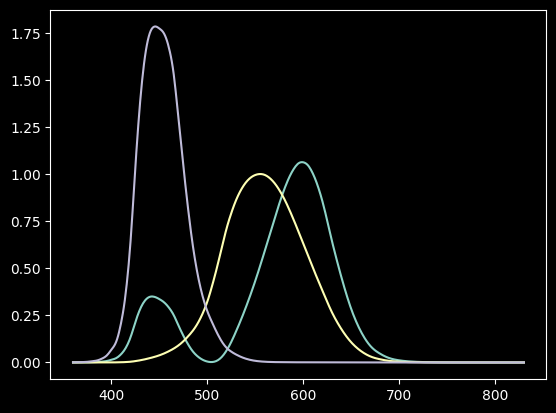

In [21]:
plt.plot(CIE_lambda, CIE_X)
plt.plot(CIE_lambda, CIE_Y)
plt.plot(CIE_lambda, CIE_Z)

C:\Users\jezersek\AppData\Local\Temp\ipykernel_678760\3884199804.py:8: RuntimeWarning: invalid value encountered in power
  rgb = np.where(rgb_linear <= 0.0031308, 12.92 * rgb_linear, 1.055 * (rgb_linear ** (1 / 2.4)) - 0.055)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


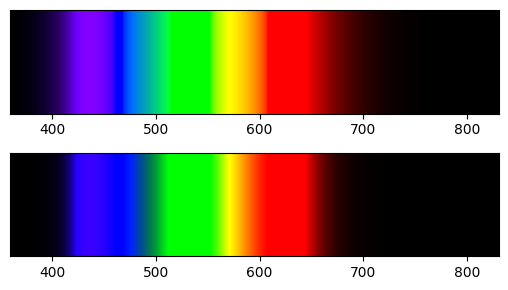

In [30]:
spectrum = np.zeros((100, len(CIE_lambda), 3))
spectrum_linear = np.zeros((100, len(CIE_lambda), 3))

for i, (l, x, y, z) in enumerate(zip(CIE_lambda, CIE_X, CIE_Y, CIE_Z)):
	rgb_linear = XYZToRGB([x, y, z])

	# # Gamma correction
	rgb = np.where(rgb_linear <= 0.0031308, 12.92 * rgb_linear, 1.055 * (rgb_linear ** (1 / 2.4)) - 0.055)
	rgb = rgb.clip(0, 1)

	spectrum[:, i, 0] = rgb[0]
	spectrum[:, i, 1] = rgb[1]
	spectrum[:, i, 2] = rgb[2]

	spectrum_linear[:, i, 0] = rgb_linear[0]
	spectrum_linear[:, i, 1] = rgb_linear[1]
	spectrum_linear[:, i, 2] = rgb_linear[2]


plt.style.use('default')

plt.figure(figsize=(8, 3))
plt.subplot(2, 1, 1)
plt.imshow(spectrum)
plt.xticks(np.arange(40, len(CIE_lambda), 100), CIE_lambda[40::100])
plt.yticks([])
plt.subplot(2, 1, 2)
plt.imshow(spectrum_linear)
plt.xticks(np.arange(40, len(CIE_lambda), 100), CIE_lambda[40::100])
plt.yticks([])
plt.tight_layout()
plt.savefig('spectrum.png', dpi=300)

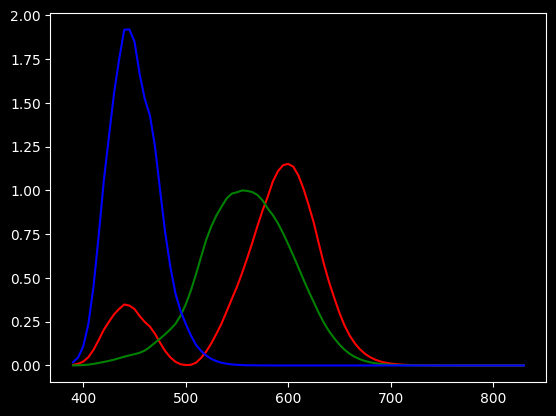

In [15]:
plt.plot(df['lam'], df['x'], label='x', color='red')
plt.plot(df['lam'], df['y'], label='y', color='green')
plt.plot(df['lam'], df['z'], label='z', color='blue')

In [17]:
print('area under x curve:', np.trapz(df['x'], df['lam']))
print('area under y curve:', np.trapz(df['y'], df['lam']))
print('area under z curve:', np.trapz(df['z'], df['lam']))

area under x curve: 113.03923957955749
area under y curve: 113.042023558782
area under z curve: 113.02712130405


[390.         438.88888889 487.77777778 536.66666667 585.55555556
 634.44444444 683.33333333 732.22222222 781.11111111 830.        ]


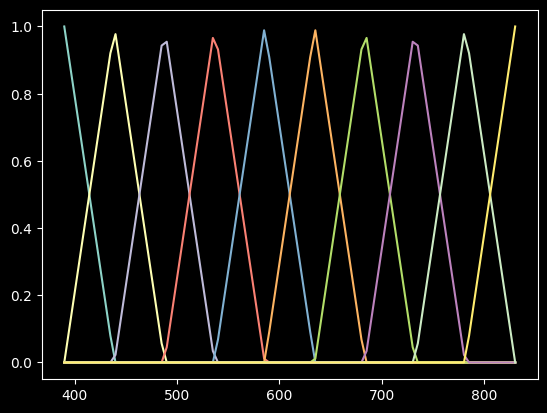

In [52]:
t = df['lam'].to_numpy()
vozli = np.linspace(t[0], t[-1], 10)
print(vozli)

# baza
H0 = np.maximum((vozli[1]-t)/(vozli[1]-vozli[0]), 0)

H1 = np.maximum(np.minimum((t-vozli[0])/(vozli[1]-vozli[0]), (vozli[2]-t)/(vozli[2]-vozli[1])), 0)

H = [np.maximum((vozli[1]-t)/(vozli[1]-vozli[0]), 0)] + [np.maximum(np.minimum((t-vozli[i-1])/(vozli[i]-vozli[i-1]), (vozli[i+1]-t)/(vozli[i+1]-vozli[i])), 0) for i in range(1, len(vozli)-1)] + [np.maximum((t-vozli[-2])/(vozli[-1]-vozli[-2]), 0)]

for h in H:
	plt.plot(t, h)